# Data Analyzation for Car Listings on Kolesa.kz 

Here I will be working on a data set of cars from Kolesa.kz. The dataset was scraped from the website and uploaded to github along with the source code. I used beautiful soup which is a python library for pulling data out of HTML and XML files. The version of the dataset we are working with is a sample of 15,855 data points and 17 columns.

The data dictionary provided with data is as follows:

* Авто - Name of the car.
* Цена - The price on the ad to sell the car in KZT
* ID - ID of the listing.
* Город - City where the listing is posted
* Кузов - The vehicle Type.
* Объем двигателя, л - Engine capacity
* Пробег - How many kilometers the car has driven.
* Коробка передач - The transmission type.
* Руль - Wheel side (Left or Right)
* Цвет - Color of the car body
* Привод - Drive gear
* Растаможен в Казахстане - Customs cleared
* Марка - Car brand
* Модель - The car model name.
* Год выпуска - Year of manufacture
* VIN - VIN code of the car
* Двигатель - Engine type

The aim of this project is to clean the data and analyze the included car listings to help me learn and practice many topics related to data science. All conclusions stated below are based on the assumption that the extracted dataset is representative of total population of Kazakhstani cars.

In [1]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import statsmodels.api as sm
import matplotlib.ticker as mtick
import seaborn as sns

In [498]:
# read dataset and display first 5 rows
data = pd.read_excel(r'C:\Users\ecws\Desktop\Udemy\Kolesa_data.xlsx')
data.head()

,Авто,Цена,ID,Город,Кузов,"Объем двигателя, л",Пробег,Коробка передач,Руль,Цвет,Привод,Растаможен в Казахстане,Марка,Модель,Год выпуска,VIN,Двигатель
0,Nissan Terrano,6200000,105113057,Нур-Султан (Астана),кроссовер,2 (бензин),10000.0,автомат,слева,черный металлик,полный привод,Да,Nissan,Terrano,2017,NaN,NaN
1,ВАЗ (Lada) Vesta,4500000,102873487,Атырау,седан,1.6 (бензин),57000.0,робот,слева,коричневый,передний привод,Да,ВАЗ (Lada),Vesta,2018,NaN,NaN
2,Lexus ES 350,17500000,92361652,Шымкент,седан,3.5 (бензин),60000.0,автомат,слева,белый металлик,передний привод,Да,Lexus,ES 350,2017,NaN,NaN
3,Dodge Intrepid,1350000,104165638,Караганда,седан,2.7 (бензин),200000.0,автомат,слева,золотистый,передний привод,Да,Dodge,Intrepid,2004,NaN,NaN
4,Nissan Cefiro,1600000,105166929,Караганда,седан,2 (бензин),NaN,типтроник,справа,черный,передний привод,Да,Nissan,Cefiro,1996,NaN,NaN


In [499]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15855 entries, 0 to 15854
Data columns (total 17 columns):
Авто                       15855 non-null object
Цена                       15855 non-null int64
ID                         15855 non-null int64
Город                      15855 non-null object
Кузов                      15855 non-null object
Объем двигателя, л         15845 non-null object
Пробег                     10816 non-null float64
Коробка передач            15855 non-null object
Руль                       15855 non-null object
Цвет                       13342 non-null object
Привод                     14238 non-null object
Растаможен в Казахстане    15855 non-null object
Марка                      15854 non-null object
Модель                     15855 non-null object
Год выпуска                15855 non-null int64
VIN                        664 non-null object
Двигатель                  8 non-null object
dtypes: float64(1), int64(3), object(13)
memory usage: 2.1+ MB


First let's do some data cleaning and data manipulation. We see that column 'Объем двигателя, л' has some missing values. We will go ahead and drop them as they represent less than 1% of total entries. Then we will create column 'Возраст' (Car age) based on Year of manufacture by substracting from year 2020. Engine capacity column requires some manipulation as it contains engine capacity and engine type in one column. We will extract engine capacity and convert to float; brackets will be removed from engine type with .strip() method. We will simplify color column by removing 'metallic' characteristic. Also, we will convert 'Растаможен в Казахстане' column to boolean type by replacing values to True/False. Finally, we can see that 'VIN' column has a lot of missing values. Therefore, we will just drop this column

In [501]:
data.dropna(axis=0, how='any', subset = ['Объем двигателя, л'], inplace = True)
data['Возраст'] = 2020 - data['Год выпуска']
new = data['Объем двигателя, л'].str.split(" ", n = 1, expand = True)
data['Объем двигателя, л'] = new[0].astype(float)
data['Двигатель'] = new[1].str.strip('()')
data['Цвет'] = data['Цвет'].str.split(" ", n = 1, expand = True)[0]
data['Растаможен в Казахстане'] = data['Растаможен в Казахстане'].replace({'Да': True, 'Нет': False})
data.drop(axis=1, columns=['VIN', 'Год выпуска'], inplace=True)

Now let's check head of the dataset and run info(), describe() methods to check if conversions/cleaning were successful.

In [502]:
data.head()

,Авто,Цена,ID,Город,Кузов,"Объем двигателя, л",Пробег,Коробка передач,Руль,Цвет,Привод,Растаможен в Казахстане,Марка,Модель,Двигатель,Возраст
0,Nissan Terrano,6200000,105113057,Нур-Султан (Астана),кроссовер,2.0,10000.0,автомат,слева,черный,полный привод,True,Nissan,Terrano,бензин,3
1,ВАЗ (Lada) Vesta,4500000,102873487,Атырау,седан,1.6,57000.0,робот,слева,коричневый,передний привод,True,ВАЗ (Lada),Vesta,бензин,2
2,Lexus ES 350,17500000,92361652,Шымкент,седан,3.5,60000.0,автомат,слева,белый,передний привод,True,Lexus,ES 350,бензин,3
3,Dodge Intrepid,1350000,104165638,Караганда,седан,2.7,200000.0,автомат,слева,золотистый,передний привод,True,Dodge,Intrepid,бензин,16
4,Nissan Cefiro,1600000,105166929,Караганда,седан,2.0,NaN,типтроник,справа,черный,передний привод,True,Nissan,Cefiro,бензин,24


In [503]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15845 entries, 0 to 15854
Data columns (total 16 columns):
Авто                       15845 non-null object
Цена                       15845 non-null int64
ID                         15845 non-null int64
Город                      15845 non-null object
Кузов                      15845 non-null object
Объем двигателя, л         15845 non-null float64
Пробег                     10811 non-null float64
Коробка передач            15845 non-null object
Руль                       15845 non-null object
Цвет                       13335 non-null object
Привод                     14229 non-null object
Растаможен в Казахстане    15845 non-null bool
Марка                      15844 non-null object
Модель                     15845 non-null object
Двигатель                  15845 non-null object
Возраст                    15845 non-null int64
dtypes: bool(1), float64(2), int64(3), object(10)
memory usage: 1.9+ MB


In [492]:
data.describe()

,Цена,ID,"Объем двигателя, л",Пробег,Возраст
count,1.584500e+04,1.584500e+04,15845.000000,1.081100e+04,15845.000000
mean,5.628920e+06,1.025656e+08,2.460527,1.822339e+05,13.796781
std,7.881336e+06,8.564799e+06,1.025523,4.472537e+05,8.977220
min,1.000000e+04,5.014122e+06,0.080000,1.000000e+00,0.000000
25%,1.600000e+06,1.032345e+08,1.600000,6.700000e+04,7.000000
50%,3.500000e+06,1.048968e+08,2.200000,1.240000e+05,13.000000
75%,6.500000e+06,1.052500e+08,2.900000,2.000000e+05,21.000000
max,2.800000e+08,1.052658e+08,9.000000,9.999999e+06,73.000000


Now, let us analyze the price distribution of the dataset. Price column has some outliers above 30,000,000 KZT. So let's filter the price below that value and plot the distribultion and Kernel density estimate plot.

Mean =  4948333.893709884
Median = 3400000.0
SD =  4926861.777470155


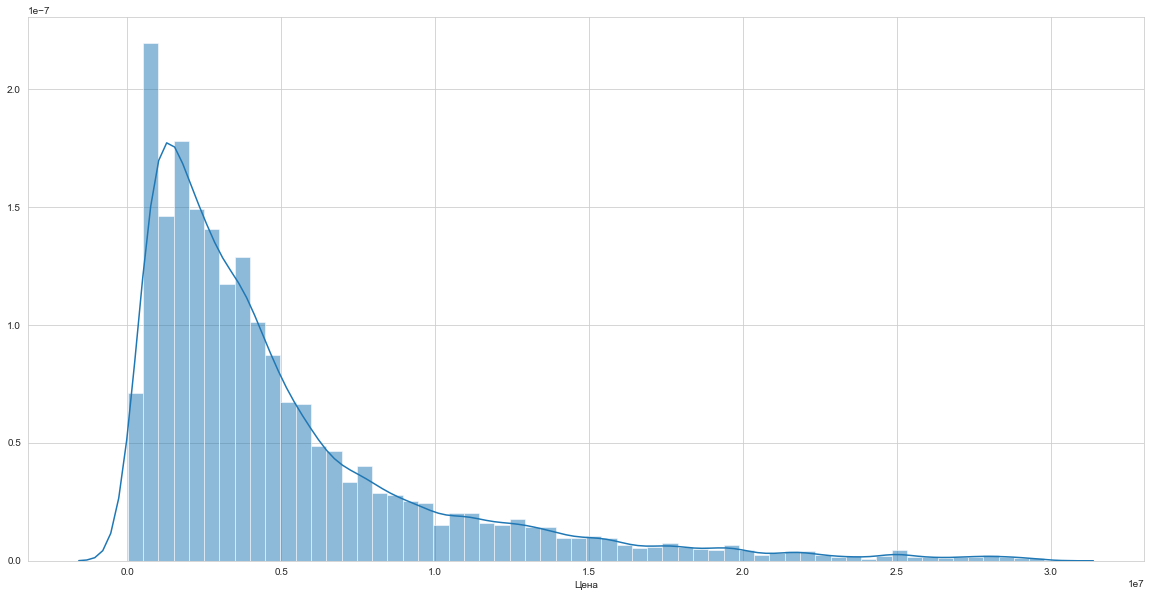

In [477]:
y = data[data['Цена']<30000000]
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.distplot(y['Цена'], kde=True,bins=60, hist_kws={"histtype": 'bar', "linewidth": 1, "alpha": 0.5})
variance = y['Цена'].var()
print('Mean = ', y['Цена'].mean())
print('Median =', y['Цена'].median())
print('SD = ', math.sqrt(variance))

From the graph above we see that price distribution is highly right skewed with the majority of the car prices falling in the price segmet under 5,000,000 KZT. In fact, mean price is just under 5,000,000 KZT. Median price, however, is 3,400,000 KZT; large difference between mean and median is a result of long tail on the right

We will now explore the mileage feature in a similar manner. Again, mileage column has some outliers, so I filtered values to be less than 500,000 km. 

Mean =  138709.04592704593
Median = 121000.0
SD =  100713.11030522878
Min = 1.0
Max = 500000.0


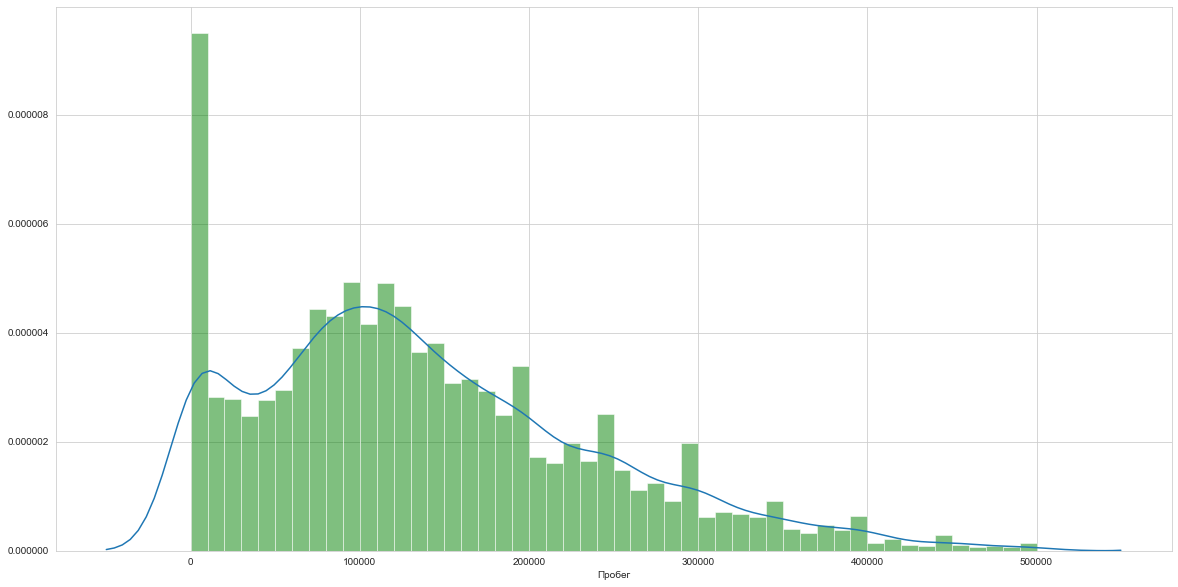

In [505]:
plt.figure(figsize=(20,10))
y = data[data['Пробег']<500001]
sns.distplot(y['Пробег'], kde=True,bins=50, hist_kws={"color": 'green', "linewidth": 1, "alpha": 0.5})
print('Mean = ', y['Пробег'].mean())
print('Median =', y['Пробег'].median())
print('SD = ', math.sqrt(y['Пробег'].var()))
print('Min =', y['Пробег'].min())
print('Max =', y['Пробег'].max())

From the mileage distribution we see that most of the cars has mileage around 100,000 km. Mean and meadian of the distribution is 138K km and 121K km respectively. Tall bar with 0km mileage must represent new car listings, whereas humps at 100K, 150K, 200K, 250K, 300K etc must represent approximate car mileages that car oweners specified. 

As with two previous features we will now plot car age distribution. 

Mean =  13.678101265822784
Median = 13.0
SD =  8.698422982343729
Min = 0
Max = 40


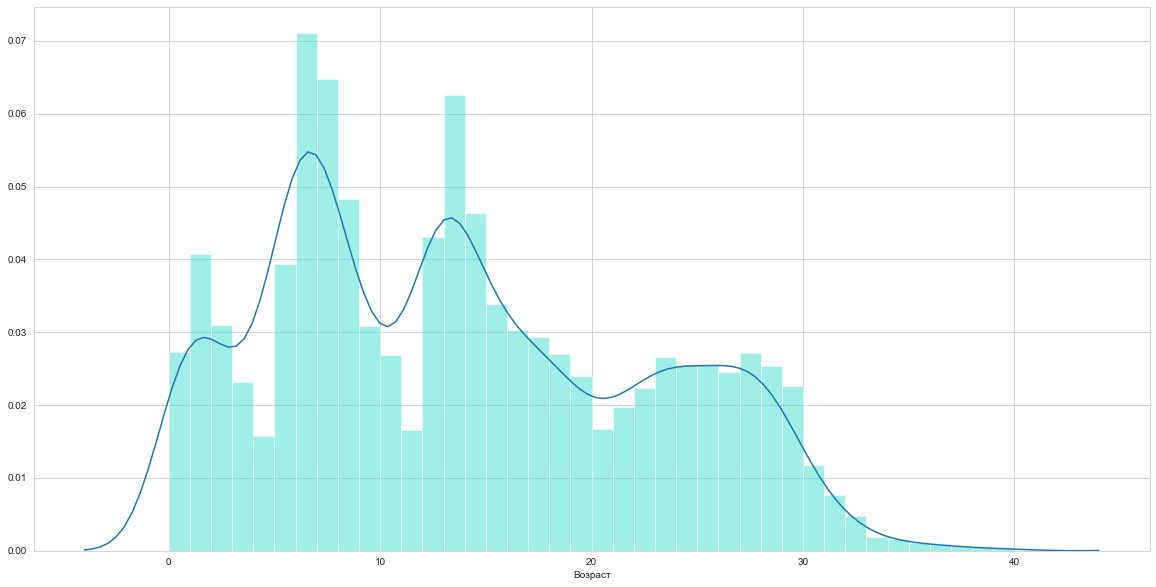

In [508]:
y = data[data['Возраст']<41]
plt.figure(figsize=(20,10))
sns.distplot(y['Возраст'], kde=True,bins=40, hist_kws={"color": 'turquoise', "linewidth": 1, "alpha": 0.5})
print('Mean = ', y['Возраст'].mean())
print('Median =', y['Возраст'].median())
print('SD = ', math.sqrt(y['Возраст'].var()))
print('Min =', y['Возраст'].min())
print('Max =', y['Возраст'].max())

We can see some interesting insights in this graph. Local minimums around age=5 and age=12 I would dare to assume represent oil crisis in 2014-2015 and global financial crisis in 2008. During those crisises local currency had been devaluated, and with less buying power a lot of people could not afford to buy a new car. We can also see that Kazakhstani car market has still a lot of cars manufactured between 1990 and 1999. Mean car age and median are close to each other and are 13.7 and 13 years respectively. 

Now we will explore favourite car brands on Kazakhstani drivers. We will group dataset by brand, cound the number of listings by group and plot 15 most popular car brands

In [261]:
# Group by Марка and sort in descending order to plot 15 most popular car brands
df = data.groupby('Марка').count().sort_values('ID', ascending=False,).head(15)

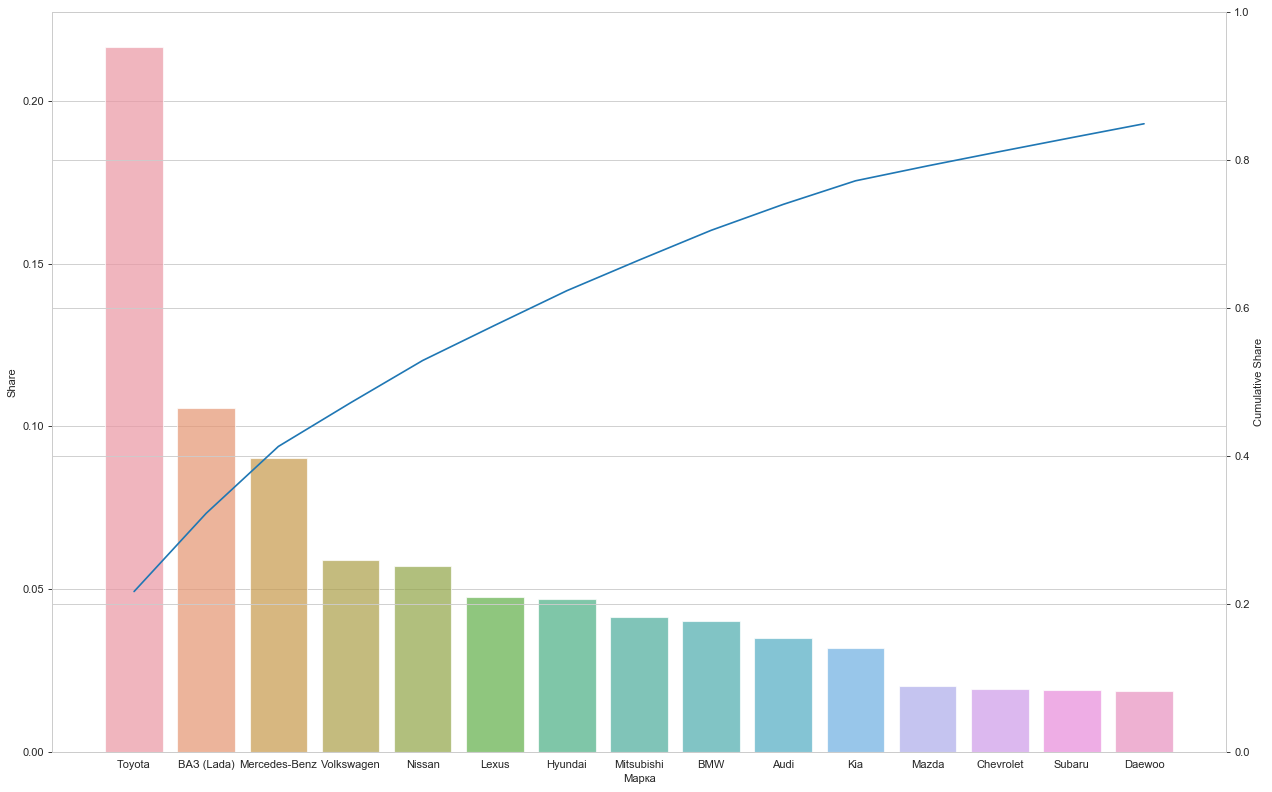

In [454]:
# Plot car brand market share (left axis) and cumulative share (right axis)
fig, ax1 = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)

sns.barplot(x=df.index, y=df.ID/data.index.size, alpha=0.7, linewidth=1)
ax1.set_ylabel('Share')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel('Cumulative Share') 
df['cdf'] = (df.ID/data.index.size).cumsum()
plt.plot(df.index, df['cdf'])
ax2.tick_params(axis='y')
ax2.set(ylim=(0, 1))
fig.tight_layout()

Toyota with the market share of about 22% is an absolute leader in terms of "Brand Choice", followed by russian VAZ and german Mercedez-Benz. Notice the ratings of korean car brands Hyundai and Kia. Let's plot the same graph, but for cars younger than 5 years.

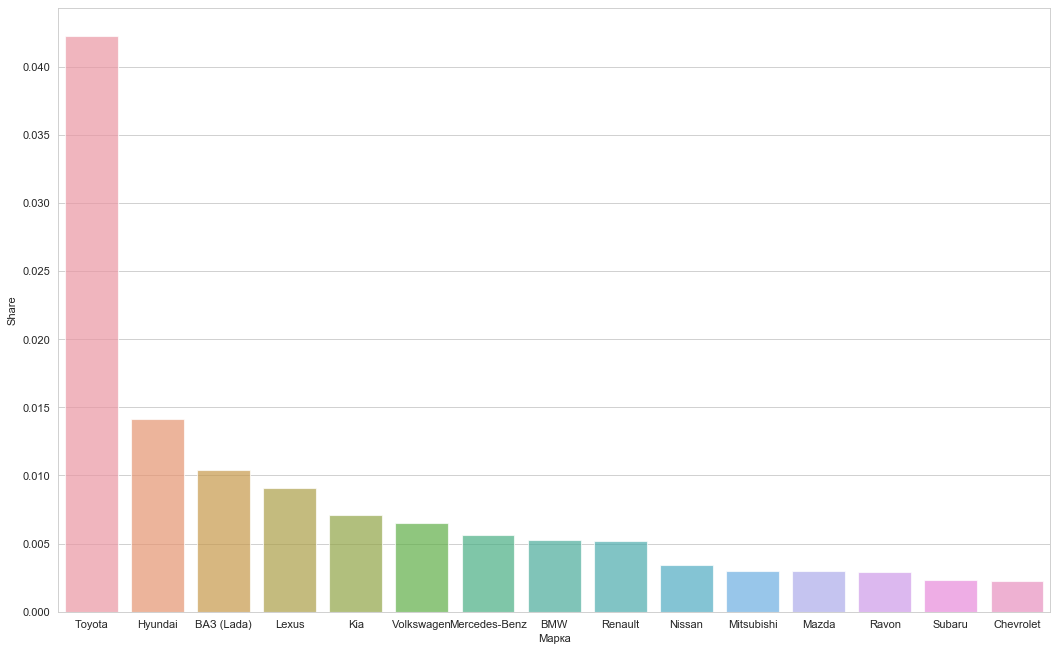

In [455]:
# Now let's see how distribution will change for newer cars (age<5years)
df2 = data[data['Возраст']<5].groupby('Марка').count().sort_values('ID', ascending=False,).head(15)
fig, ax1 = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)

sns.barplot(x=df2.index, y=df2.ID/data.index.size, alpha=0.7, linewidth=1)
ax1.set_ylabel('Share')
ax1.tick_params(axis='y')

Here we see that Toyota is still the clear leader. However, Hyundai and Kia are now 2nd and 5th places respectively dethroning german luxury brands such as Mercedez, BMW and Vokswagen. 

Output below shows 15 most popular car makes for all years

In [456]:
df3 = data['Авто'].value_counts()
df3.head(15)

Toyota Camry                 1096
Toyota Land Cruiser Prado     414
Toyota Land Cruiser           356
Volkswagen Passat             285
ВАЗ (Lada) 2114 (хэтчбек)     274
Toyota Corolla                220
Toyota RAV 4                  217
Hyundai Accent                213
ВАЗ (Lada) 2170 (седан)       204
Volkswagen Golf               200
ГАЗ ГАЗель                    192
Audi 100                      174
Daewoo Nexia                  173
Lexus LX 570                  144
Kia Rio                       144
Name: Авто, dtype: int64

Output below shows top 15 cities with highest number of car listings. Notice Vladivostok which is not a Kazakhstani city. Vladivostok is located close to South Korea and Japan. I assume business owners provide service of car deliveries (not custom_cleared) from either of those counties. 

In [509]:
df4= data['Город'].value_counts()
df4[df4>100]

Алматы                 3779
Нур-Султан (Астана)    2744
Шымкент                1048
Караганда               940
Актобе                  693
Атырау                  659
Уральск                 560
Костанай                538
Актау                   522
Владивосток             450
Павлодар                380
Тараз                   378
Усть-Каменогорск        372
Кызылорда               271
Кокшетау                242
Петропавловск           220
Семей                   219
Талдыкорган             160
Туркестан               120
Name: Город, dtype: int64

Since we mentioned custom clearance above, let's actually see if price differs for those cars that have been custom cleared and not. Based on graph below we clearly see the cars with cleared customs are priced on average 30-40% higher than those that are not.

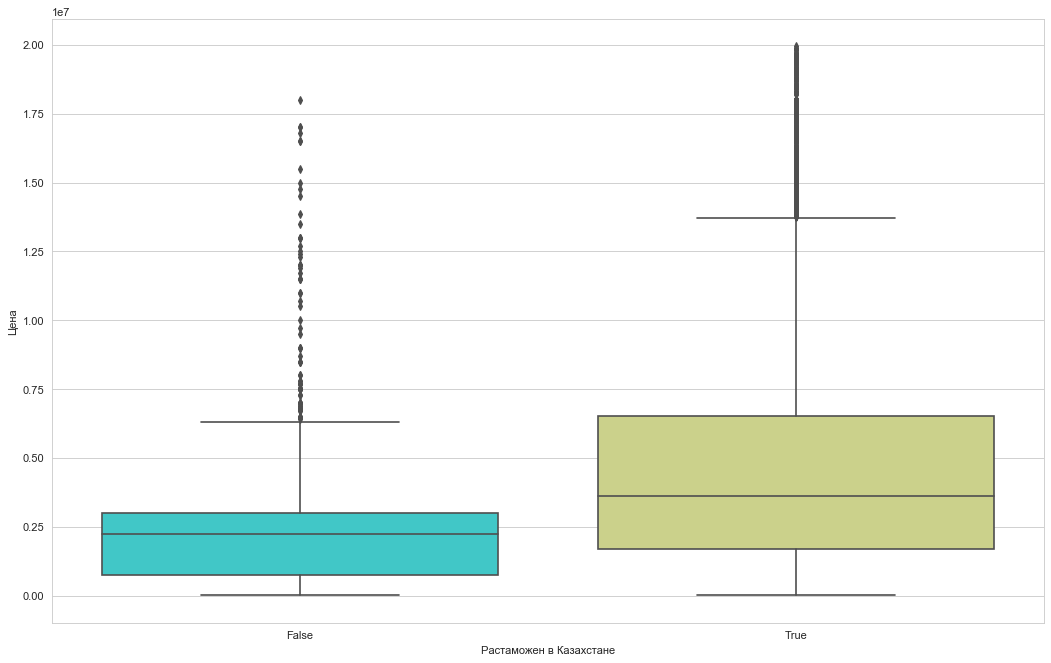

In [510]:
fig, ax1 = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
sns.boxplot(x="Растаможен в Казахстане", y="Цена", data=data[data['Цена']<20000000],palette='rainbow')

# Conclusion

Here I tried to analize and vizualize findings from the dataset. Let's recap some of the notable findings. Toyota with its sedan Camry is absolutely popular in Kazakhstan. While Korean brands are gaining popularity in recent years, Toyota will still be in a leading position in the next several years. A big chunk of cars manufactured in 1990s are still on the roads of Kazakhstani cities and towns. External factors such as global crisises greatly affect the local car market. 
Thanks for reading and following along.